In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from acquire import *
from prepare import *

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [41]:
def less_confusing_matrix(x, y):
    cm = pd.DataFrame(confusion_matrix(x, y), columns=['Actual +', 'Actual -'], index=['Pred +', 'Pred -'])
    return cm

In [2]:
df = prep_titanic(get_titanic_data())
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [3]:
df.dropna(inplace=True)

In [4]:
train, test = train_test_split(df)

In [5]:
scaler = MinMaxScaler()
scaler.fit(train[['age', 'fare']])

train[['age', 'fare']] = scaler.transform(train[['age', 'fare']])
test[['age', 'fare']] = scaler.transform(test[['age', 'fare']])

In [6]:
logit = LogisticRegression()

logit.fit(train[['pclass', 'sibsp', 'parch']], train.survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
logit.predict(train[['pclass','sibsp','parch']])

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,

In [8]:
logit.predict_proba(train[['pclass','sibsp','parch']])

array([[0.74411695, 0.25588305],
       [0.55874994, 0.44125006],
       [0.74411695, 0.25588305],
       ...,
       [0.41040989, 0.58959011],
       [0.54238193, 0.45761807],
       [0.80220314, 0.19779686]])

In [9]:
train['prediction'] = logit.predict(train[['pclass', 'sibsp','parch']])

In [10]:
logit.score(train[['pclass','sibsp','parch']], train.survived)

0.6785046728971963

In [11]:
co_m = confusion_matrix(train.survived, train.prediction).transpose()
print(co_m)

[[252 113]
 [ 59 111]]


In [12]:
print(classification_report(train.survived, train.prediction))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       311
           1       0.65      0.50      0.56       224

   micro avg       0.68      0.68      0.68       535
   macro avg       0.67      0.65      0.65       535
weighted avg       0.67      0.68      0.67       535



In [42]:
cm = pd.DataFrame(confusion_matrix(train.survived, train.prediction),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

cm

,Pred -,Pred +
Actual -,252,59
Actual +,113,111


In [71]:
def matrix_helper(cm):
    tp = cm.loc['Actual +', 'Pred +']
    fn = cm.loc['Actual +', 'Pred -']
    fp = cm.loc['Actual -', 'Pred +']
    tn = cm.loc['Actual -', 'Pred -']

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = (recall + precision) / 2
    support = tp + fn

    print(f'TP:    {tp}')
    print(f'FN:    {fn}')
    print(f'FP:    {fp}')
    print(f'TN:    {fn}\n\n')

    print(f'Accuracy: {(tp + tn) / (tp + fn + fp + tn):.2f}')
    print(f'TP Rate:  {tp / (tp + fn):.2f} --> Recall or Sensitivity')
    print(f'FP Rate:  {fp / (fp + tn):.2f} --> Classification')
    print(f'TN Rate:  {tn / (fp + tn):.2f}')
    print(f'FN Rate:  {fn / (tp + fn):.2f}\n\n')

    print('recall:    %.2f' % recall)
    print('precision: %.2f' % precision)
    print('f1:        %.2f' % f1)
    print('support:   %4d' % support)

In [69]:
less_confusing_matrix(train.survived, train.prediction)

,Actual +,Actual -
Pred +,252,59
Pred -,113,111


In [72]:
matrix_helper(cm)

TP:    111
FN:    113
FP:    59
TN:    113


Accuracy: 0.68
TP Rate:  0.50 --> Recall or Sensitivity
FP Rate:  0.19 --> Classification
TN Rate:  0.81
FN Rate:  0.50


recall:    0.50
precision: 0.65
f1:        0.57
support:    224


In [91]:
X = df[['pclass','age','fare','sibsp','parch']]
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,fare,sibsp,parch
60,3,22.0,7.2292,0,0
348,3,3.0,15.9000,1,1
606,3,30.0,7.8958,0,0
195,1,58.0,146.5208,0,0
56,2,21.0,10.5000,0,0


In [103]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='sag')

In [104]:
logit.fit(X_train, y_train)
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.05547772 -0.0068258   0.01878062 -0.03752115  0.02680324]]
Intercept: 
 [0.00653649]


In [105]:
y_pred = logit.predict(X_train)

In [106]:
y_pred_proba = logit.predict_proba(X_train)

In [107]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.66


In [108]:
print(confusion_matrix(y_train, y_pred))

[[188 105]
 [ 65 141]]


In [109]:
less_confusing_matrix(y_train, y_pred)

,Actual +,Actual -
Pred +,188,105
Pred -,65,141


In [110]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       293
           1       0.57      0.68      0.62       206

   micro avg       0.66      0.66      0.66       499
   macro avg       0.66      0.66      0.66       499
weighted avg       0.67      0.66      0.66       499



In [111]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.67


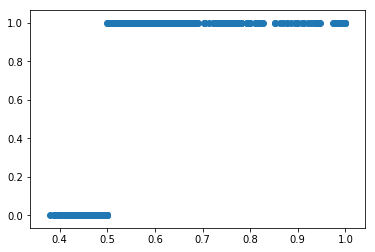

In [112]:
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)

In [102]:
y_pred_proba

[0.40789396738583267,
 0.5837956176122896,
 0.3483556432920513,
 0.7531395421864524,
 0.6748610381566311,
 0.4318919119558114,
 0.4007495254561765,
 0.8213824641858191,
 0.8271523304904407,
 0.41558379982056814,
 0.8458346461243514,
 0.4318766104478761,
 0.8666928870647661,
 0.4356571320734681,
 0.6125708137212633,
 0.4168218965561323,
 0.5710031244030409,
 0.3763986180131791,
 0.35875763972199964,
 0.9511619340262736,
 0.7432581775461992,
 0.6110035971487222,
 0.45305513894428173,
 0.4008134029794431,
 0.40863892074412317,
 0.393034379233928,
 0.6483047368726315,
 0.669638860439041,
 0.950820391439876,
 0.34780509742297755,
 0.43151187487983295,
 0.724508085773407,
 0.49954334756335184,
 0.7336536868872493,
 0.4483769212364834,
 0.8014039025875441,
 0.3583336536910362,
 0.7237490275895759,
 0.9548325802955278,
 0.6555686872088434,
 0.7578998898188966,
 0.32688388123453843,
 0.3193498368841352,
 0.32821132454371377,
 0.5801726849497347,
 0.32922577281919163,
 0.39895657702763504,
 0.86

In [113]:
dfi = prep_iris(get_iris_data())

In [114]:
dfi.columns = [col.lower().replace('.', '_') for col in dfi]

In [115]:
X = dfi.drop(['species'],axis=1)
y = dfi[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encode
114,5.8,2.8,5.1,2.4,2
136,6.3,3.4,5.6,2.4,2
53,5.5,2.3,4.0,1.3,1
19,5.1,3.8,1.5,0.3,0
38,4.4,3.0,1.3,0.2,0


In [116]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

In [117]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [118]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [119]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0

In [120]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 1.00


In [121]:
confusion_matrix(y_train, y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 33]])

In [122]:
y_train.species.value_counts()

versicolor    40
virginica     33
setosa        32
Name: species, dtype: int64

In [123]:
labels = sorted(y_train.species.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,setosa,versicolor,virginica
setosa,32,0,0
versicolor,0,40,0
virginica,0,0,33


In [124]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        33

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [125]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 1.00


In [127]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [162]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data, filename='tree', format='png') 
graph.render(cleanup=True, view=True)

'tree.png'